In [ ]:
##Importar librerias
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import layers, models
from keras.callbacks import EarlyStopping
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Semillas para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
'''
import os
import random

# Ruta a la carpeta que contiene los archivos
carpeta = '/content/drive/MyDrive/Figuras/geometric shapes dataset'

# Obtener lista de todos los archivos (no carpetas)
archivos = [f for f in os.listdir(carpeta) if os.path.isfile(os.path.join(carpeta, f))]

# Verificar que haya suficientes archivos
if len(archivos) < 1500:
    print(f"Solo hay {len(archivos)} archivos. No se pueden eliminar 4000.")
else:
    # Seleccionar aleatoriamente 4000 archivos
    archivos_a_eliminar = random.sample(archivos, 1500)

    # Eliminar los archivos seleccionados
    for archivo in archivos_a_eliminar:
        ruta_completa = os.path.join(carpeta, archivo)
        try:
            os.remove(ruta_completa)
            print(f"Eliminado: {archivo}")
        except Exception as e:
            print(f"Error eliminando {archivo}: {e}")


In [ ]:
# 📥 Cargar datos desde carpeta
directorio_datos = "/content/drive/MyDrive/Figuras/geometric shapes dataset"
X = []
y = []
clases = {'Circle': 0, 'Square': 1, 'Triangle': 2}

In [ ]:
for clase, etiqueta in clases.items():
    carpeta = os.path.join(directorio_datos, clase)
    if os.path.exists(carpeta):
        print(f"Procesando carpeta: {carpeta}")

        #  Contador de imágenes por carpeta
        contador = 0

        for archivo in os.listdir(carpeta):
            if archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
                if contador >= 5000:
                    break  #  Limitar a 5000 imágenes por clase

                ruta = os.path.join(carpeta, archivo)
                try:
                    img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
                    if img is None:
                        raise ValueError("La imagen no se pudo cargar correctamente.")

                    img = cv2.resize(img, (200, 200))
                    img = img.astype('float32') / 255.0
                    img_array = img[..., np.newaxis]  # (200, 200, 1)

                    X.append(img_array)
                    y.append(etiqueta)
                    contador += 1  #  Contar imagen válida
                except Exception as e:
                    print(f"Error procesando {ruta}: {e}")

Procesando carpeta: C:/Users/migue/Downloads/Figuras/Circle
Procesando carpeta: C:/Users/migue/Downloads/Figuras/Square
Procesando carpeta: C:/Users/migue/Downloads/Figuras/Triangle


In [ ]:
# Convertir listas a arrays de numpy
X = np.array(X, dtype='float32')
y = np.array(y)
print(f"Total de imágenes cargadas: {len(X)}")
print(os.listdir(directorio_datos))

Total de imágenes cargadas: 15000
['Circle', 'Square', 'Triangle']


In [ ]:
#  División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
#  Definición del modelo
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(200, 200, 1)),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 126s 382ms/step - accuracy: 0.4669 - loss: 1.0230
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 128s 390ms/step - accuracy: 0.5409 - loss: 0.9290
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 133s 403ms/step - accuracy: 0.5964 - loss: 0.8248
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 120s 364ms/step - accuracy: 0.6595 - loss: 0.7192
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 118s 358ms/step - accuracy: 0.7187 - loss: 0.6029
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 123s 374ms/step - accuracy: 0.7480 - loss: 0.5380
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 124s 376ms/step - accuracy: 0.7837 - loss: 0.4746
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 128s 388ms/step - accuracy: 0.8121 - loss: 0.4299
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 121s 366ms/step - accuracy: 0.8391 - loss: 0.3642
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 118s 358ms/step - accuracy: 0.8526 - loss: 0.3343
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 117s 354ms/step - accuracy: 0.8724 - loss: 0.3025
Epoch 12

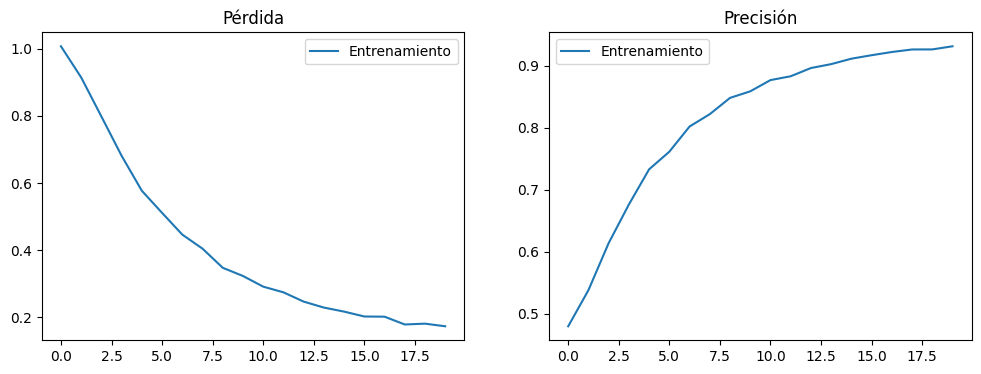

In [ ]:
# Gráficas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.title('Pérdida')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.title('Precisión')
plt.legend()
plt.show()

In [ ]:
# Evaluación en test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en prueba: {test_accuracy:.4f}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.7162 - loss: 1.4692
Precisión en prueba: 0.7300


In [ ]:
model.save('mi_modelo_completo.h5')
model.save('mi_modelo_completo.keras')